# **Agrupamento de Clientes Nivel de Consumo**

1. data: data no formato dd/mm/aaaa
2. tempo: tempo no formato hh: mm: ss
3.global_active_power: Potência ativa média minuto global doméstica (em quilowatt)
4.global_reactive_power: Potência reativa média minuto domiciliar (em quilowatt)
5. tensão: minuto-média tensão (em volt)
6.global_intensity: Intensidade de corrente média minuto global domiciliar (em ampère)
7.sub_metering_1: submedição de energia nº 1 (em watt-hora de energia ativa). Corresponde à cozinha, contendo principalmente uma lavagem de louça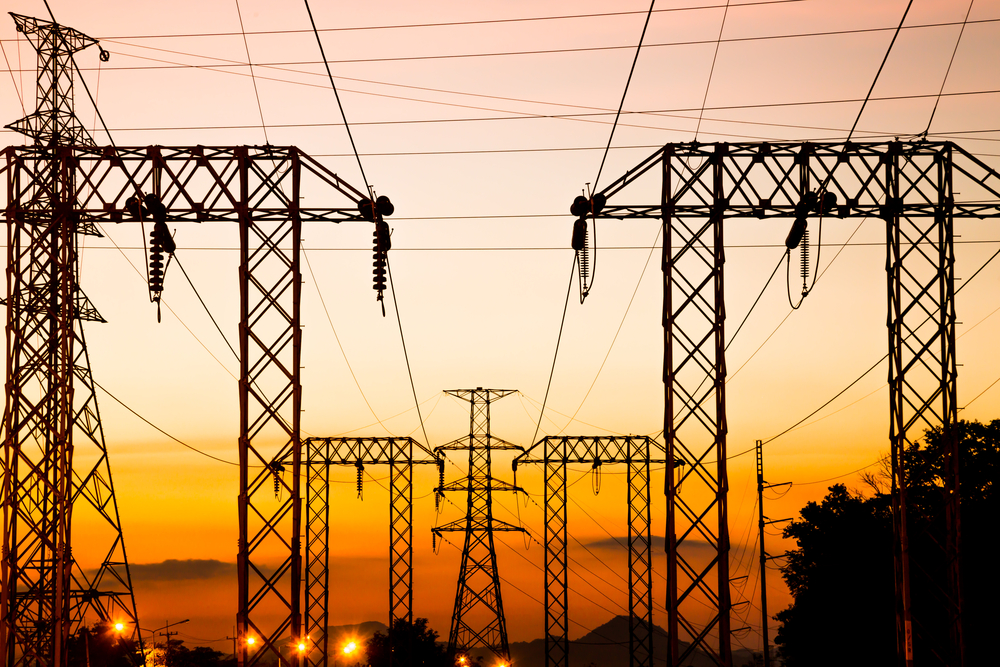

# Importando as Bibliotecas


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import cdist, pdist
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
#  Base de dados
dataset = pd.read_csv("household_power_consumption.txt",delimiter =';',low_memory=False)

# visualizar a base de dados
dataset.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [ ]:
dataset.tail()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
490119,22/11/2007,02:03:00,0.226,0.000,246.070,1.000,0.000,0.000,0.0
490120,22/11/2007,02:04:00,0.226,0.000,246.000,1.000,0.000,0.000,0.0
490121,22/11/2007,02:05:00,0.226,0.000,246.260,1.000,0.000,0.000,0.0
490122,22/11/2007,02:06:00,0.226,0.000,246.570,1.000,0.000,0.000,0.0
490123,22/11/2007,02:07:00,0.228,0.000,247.,NaN,NaN,NaN,NaN


In [ ]:
# ver o tamanho da base de dados
dataset.shape

(490124, 9)

In [ ]:
# verificar o tipo dos campos
dataset.dtypes


Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

In [ ]:
# Informaçoes gerais do daset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490124 entries, 0 to 490123
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Date                   490124 non-null  object 
 1   Time                   490124 non-null  object 
 2   Global_active_power    490124 non-null  object 
 3   Global_reactive_power  490124 non-null  object 
 4   Voltage                490124 non-null  object 
 5   Global_intensity       490123 non-null  object 
 6   Sub_metering_1         490123 non-null  object 
 7   Sub_metering_2         490123 non-null  object 
 8   Sub_metering_3         486190 non-null  float64
dtypes: float64(1), object(8)
memory usage: 33.7+ MB


In [ ]:
# checando onde há  valores missing
dataset.isnull().values.any()

True

In [ ]:
# onde estão os valores missing
dataset.isnull().sum()

Date                        0
Time                        0
Global_active_power         0
Global_reactive_power       0
Voltage                     0
Global_intensity            1
Sub_metering_1              1
Sub_metering_2              1
Sub_metering_3           3934
dtype: int64

#  Pré-Processamento dos Dados

In [ ]:
# Remove os registro com o valores NA e remove as duas primeira colunas , elas não são nesserarios
dataset = dataset.iloc[0:, 2:9].dropna()


In [ ]:
# verificando as primeiras linhas
dataset.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [ ]:
# Chegando se a valores missing
dataset.isnull().values.any()

False

In [ ]:
# conferindo se tem NAS
dataset.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [ ]:
# obtém os valores de atributo. obtem os valoresde cada variável num formato de array
dataset_atrib = dataset.values


In [ ]:
# Imprimir o array , valores x
dataset_atrib

array([['4.216', '0.418', '234.840', ..., '0.000', '1.000', 17.0],
       ['5.360', '0.436', '233.630', ..., '0.000', '1.000', 16.0],
       ['5.374', '0.498', '233.290', ..., '0.000', '2.000', 17.0],
       ...,
       ['0.226', '0.000', '246.000', ..., '0.000', '0.000', 0.0],
       ['0.226', '0.000', '246.260', ..., '0.000', '0.000', 0.0],
       ['0.226', '0.000', '246.570', ..., '0.000', '0.000', 0.0]],
      dtype=object)

In [ ]:
# coleta uma amostra de 1% dos  dados para comprometer a memoria do computador
dataset, amostra2 = train_test_split(dataset_atrib,train_size= .01)

In [ ]:
dataset.shape

(4861, 7)

# **Máquina Preditiva Segmentação  de Clientes**


Usaremos PCA para reduzir as quantidade de variaveis

PCA é uma Técnica de Aprendizagem não Supervisionada utilizada para reduzir a dimesionalidade dos dados dos dados.
aqui é o sequinte:
transformando as 7 variaveis em 2 variaveis principais

In [ ]:
# Aplica redução de dimensionalidade no array as variais
pca = PCA(n_components= 2).fit_transform(dataset)

In [ ]:
# determinando o hyperparâmetro "K" do kmeans
k_range = range(1,12)
k_range

range(1, 12)

In [ ]:
# Aplicando o modelo K-Means para cada valor de K  (esta célula pode levar bastante tempo para ser executada)
k_means_var = [KMeans(n_clusters= k).fit(pca) for k in k_range]

# Curva de Elbow

Text(0.5, 1.0, 'Variância Explicada para cada Valor de K')

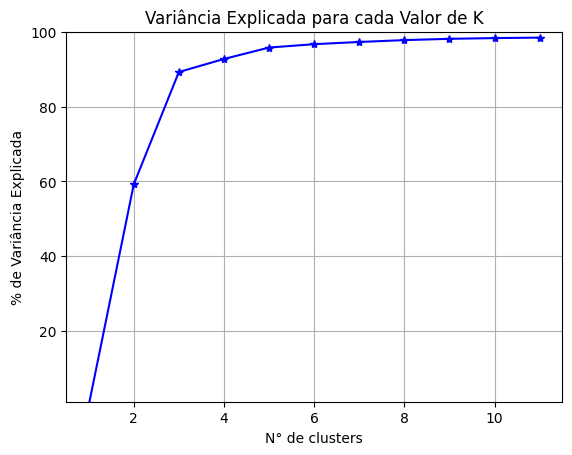

In [ ]:
# Ajustando o centróide do cluster para cada modelo
centroids = [X.cluster_centers_ for X in k_means_var ]

# Calculando a distância euclidiana de cada  ponto de dado para o centróide
k_euclid  = [cdist(pca, cent, 'euclidean')  for cent in centroids]
dist = [np.min(ke,axis= 1) for ke in k_euclid ]

# soma dos quadrados das distâncias dentro do cluster
soma_quadrados_intra_cluster = [sum(d**2)for d in dist]

# soma total dos quadrados
soma_total = sum(pdist(pca)**2)/pca.shape[0]

# soma dos quadrados enttre cluster
soma_quadrados_inter_cluster = soma_total - soma_quadrados_intra_cluster

# curva de Elbow
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(k_range, soma_quadrados_inter_cluster/soma_total * 100, 'b*-')
ax.set_ylim((1,100))
plt.grid(True)
plt.xlabel('N° de clusters')
plt.ylabel('% de Variância Explicada')
plt.title('Variância Explicada para cada Valor de K')

Escolhendo um valor de K inicial ( igual a 8) para avaliação da Máquina Preditiva

In [ ]:
# criando um modelo com k = 8
modelo_v1 = KMeans(n_clusters=8)
modelo_v1.fit(pca)

KMeans()

# **Avaliação da Máquina Preditiva**

In [ ]:
# Avaliando a Máquina Preditiva
# obtém os valores minimos e máximos e orgniza o shape
x_min, x_max = pca[:, 0].min()- 5, pca[:, 0].max() - 1
y_min, y_max = pca[:, 1].min()+ 1, pca[:, 1].max() + 5
xx,yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))
z = modelo_v1.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

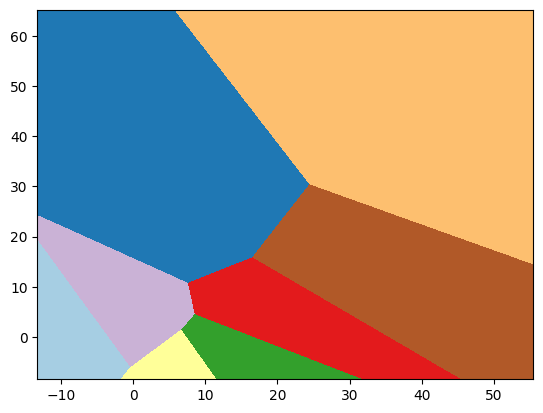

In [ ]:
# plot das áreas dos  clusters
plt.figure(1)
plt.clf()
plt.imshow(z,
           interpolation = 'nearest',
           extent = (xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Paired,
           aspect = 'auto' ,
           origin = 'lower')

In [ ]:
# Métrica de avaliação para Clusterização
# the  best  value is 1  and the worst value is -1
?silhouette_score

In [ ]:
modelo_v1.

In [ ]:
# Silhouette score
labels = modelo_v1.labels_

silhouette_score(pca,labels, metric = 'euclidean' )

0.6934731487929999

# Avaliando a Máquina Preditiva V2  com k=9

In [ ]:
# criando um modelo com k = 9
modelo_v2 = KMeans(n_clusters=9)
modelo_v2.fit(pca)

KMeans(n_clusters=9)

In [ ]:
# Silhouette score
labels = modelo_v2.labels_

silhouette_score(pca,labels, metric = 'euclidean' )

0.6778117397834174

# Avaliando a Máquina Preditiva V3 com k=10

In [ ]:
# criando um modelo com k = 10
modelo_v3 = KMeans(n_clusters=10)
modelo_v3.fit(pca)

KMeans(n_clusters=10)

In [ ]:
# Silhouette score
labels = modelo_v3.labels_

silhouette_score(pca,labels, metric = 'euclidean' )

0.5441763311738509

# Avaliando a Máquina Preditiva V4 com k=11

In [ ]:
# criando um modelo com k = 11
modelo_v4 = KMeans(n_clusters=11)
modelo_v4.fit(pca)

KMeans(n_clusters=11)

In [ ]:
# Silhouette score
labels = modelo_v4.labels_

silhouette_score(pca,labels, metric = 'euclidean' )

0.5491530937734227

# Usando a Marcação dos Clusters da Máquina Preditiva Final .

In [ ]:
# Lista com  Nomes da Colunas
names = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1','Sub_metering_2','Sub_metering_3' ]

In [ ]:
# Incluindo o n° do cluster na base  de clientes
cluster_map = pd.DataFrame(dataset, columns = names)
cluster_map['Global_active_power'] = pd.to_numeric(cluster_map['Global_active_power'])
cluster_map['cluster'] = modelo_v3.labels_

In [ ]:
cluster_map

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,cluster
0,0.500,0.278,235.250,2.400,0.000,1.000,0.0,1
1,0.796,0.088,242.950,3.400,0.000,0.000,0.0,1
2,4.056,0.402,232.780,17.400,37.000,0.000,17.0,2
3,0.514,0.228,238.910,2.400,0.000,0.000,0.0,1
4,0.270,0.066,237.530,1.200,0.000,0.000,0.0,6
...,...,...,...,...,...,...,...,...
4856,0.300,0.076,238.790,1.200,0.000,0.000,0.0,6
4857,0.216,0.100,243.540,1.200,0.000,0.000,0.0,6
4858,0.270,0.086,245.260,1.200,0.000,0.000,0.0,6
4859,3.246,0.138,235.660,13.800,0.000,36.000,0.0,3


In [ ]:
# Calcula a média de consumo de energia por Gluster
cluster_map.groupby('cluster')['Global_active_power'].mean()

cluster
0    3.035553
1    0.512227
2    4.232202
3    3.171900
4    6.052667
5    1.512937
6    0.270859
7    3.247435
8    1.975032
9    2.189331
Name: Global_active_power, dtype: float64

# Explicação  


**PCA --->** para acelerar o tempo de desenvolvimento uso 2 componetes ao invés de 7 variais .


Valor de K ---> **negrito** não sabemos o melhor...Vamos usar uma range de valores

**Métrica  --->** Avaliação da Máquina:

Usamos o Silhouette score . quanto mais proximo de 1,melhor .


**Resultado:**

Ogrupo 8 tem a maio taxa de consumo de energia.

